## Randomly recommend 12 articles to customers for 2019 Summer Menswear data

In [1]:
import pandas as pd
import numpy as np
import collaborative_filter as cf
import matplotlib.pyplot as plt
import random

In [2]:
##read 2019 567 Menswear transaction data 
transaction_men_raw = pd.read_csv("../data/large_data/transaction_2019_567_Menswear.csv")
transaction_men_raw

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
1,140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
2,141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
3,142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
4,143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286342,5273975,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286343,5273976,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286344,5273978,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,663793009,0.022864,1,2019,7,31,663793,...,Underwear Jersey,F,Menswear,3,Menswear,26,Men Underwear,1017,"Under-, Nightwear",Briefs in stretch cotton jersey with flatlock ...
286345,5273979,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,501619019,0.022864,1,2019,7,31,501619,...,Shirt,F,Menswear,3,Menswear,20,Contemporary Smart,1011,Shirts,Shirt in an airy cotton weave with a turn-down...


In [3]:
%%time

random.seed(1)

AOP_results = []
MAP_results = []
num_users = []
timeline = []

for wk in range(18,31):
    #mask_train = transaction_men_raw.week == wk
    mask_train = transaction_men_raw.week <= wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #get unique article id from train
    unique_articles_train = list(X_train.article_id.unique())
    
    #select random 12 articles
    random12items = random.choices(unique_articles_train, k=12)
    
    #dict to store customer_id and random12 items
    random_recommend = {}
    
    #customer
    customer_IDs = list(X_test.customer_id.unique())
    
    for customer in customer_IDs:
        random_recommend[customer] = random12items
        
    #calculate AOP@12 for each train-test group
    AOP12_random, num_user = cf.AOP(random_recommend, X_test)
    AOP_results.append(AOP12_random)

    #calculate MAP@12 for each train-test group
    MAP12_random, num_user = cf.MAP(random_recommend, X_test)
    MAP_results.append(MAP12_random)
    
    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))


  2%|█▊                                                                           | 124/5098 [00:00<00:04, 1077.00it/s]

Number of users: 5098


  2%|█▎                                                                            | 102/6158 [00:00<00:06, 957.90it/s]

Number of users: 5098


  1%|█▏                                                                             | 88/6158 [00:00<00:06, 873.40it/s]

Number of users: 6158


  1%|▉                                                                              | 86/6984 [00:00<00:08, 854.04it/s]

Number of users: 6158


  3%|█▉                                                                            | 175/6984 [00:00<00:07, 869.52it/s]

Number of users: 6984


  1%|▌                                                                              | 64/8212 [00:00<00:12, 636.14it/s]

Number of users: 6984


  2%|█▍                                                                            | 153/8212 [00:00<00:10, 757.24it/s]

Number of users: 8212


  1%|█                                                                              | 88/6289 [00:00<00:07, 865.05it/s]

Number of users: 8212


  1%|█▏                                                                             | 91/6289 [00:00<00:06, 901.12it/s]

Number of users: 6289


  2%|█▎                                                                            | 104/6336 [00:00<00:06, 916.48it/s]

Number of users: 6289


  3%|██▋                                                                           | 214/6336 [00:00<00:06, 938.58it/s]

Number of users: 6336


  1%|▌                                                                              | 64/9897 [00:00<00:15, 629.12it/s]

Number of users: 6336


  1%|▉                                                                             | 126/9897 [00:00<00:15, 623.64it/s]

Number of users: 9897


  1%|▋                                                                            | 106/11093 [00:00<00:20, 534.51it/s]

Number of users: 9897


  1%|▊                                                                            | 114/11093 [00:00<00:19, 567.61it/s]

Number of users: 11093


  0%|                                                                                         | 0/9243 [00:00<?, ?it/s]

Number of users: 11093


  2%|█▏                                                                            | 140/9243 [00:00<00:13, 688.16it/s]

Number of users: 9243


  2%|█▌                                                                            | 156/8023 [00:00<00:10, 779.68it/s]

Number of users: 9243


  2%|█▋                                                                            | 178/8023 [00:00<00:09, 789.11it/s]

Number of users: 8023


  1%|▊                                                                              | 80/7527 [00:00<00:09, 794.21it/s]

Number of users: 8023


  2%|█▊                                                                            | 173/7527 [00:00<00:08, 818.97it/s]

Number of users: 7527


  1%|▌                                                                              | 68/8844 [00:00<00:12, 675.08it/s]

Number of users: 7527


  2%|█▏                                                                            | 138/8844 [00:00<00:12, 685.00it/s]

Number of users: 8844


  4%|███▍                                                                         | 139/3138 [00:00<00:02, 1379.90it/s]

Number of users: 8844


  9%|██████▉                                                                      | 282/3138 [00:00<00:02, 1399.63it/s]

Number of users: 3138


100%|████████████████████████████████████████████████████████████████████████████| 3138/3138 [00:02<00:00, 1351.53it/s]

Number of users: 3138
Wall time: 4min 15s


In [4]:
print(AOP_results)
print(MAP_results)
print(num_users)

[0.0011278932914868568, 0.0004195084984302263, 0.0016466208476517774, 0.00045664880662445227, 0.00034451688132718496, 0.0006181607744107748, 0.0003957428176888622, 0.0002629285735749272, 0.0001893324678134804, 0.00011425485063774981, 0.0011624817324299183, 0.00017902909693954464, 0.000424899086466964]
[0.0012631575756820947, 0.00027506922095262465, 0.0012434609692628029, 0.00029361266270667145, 0.0001807862755549192, 0.0005710775192703857, 0.0007658809985272552, 0.00014953080230732795, 0.00022281594011551816, 0.0001342899175692395, 0.0011492609290536763, 0.00027728095061880674, 0.0002894672927337045]
[5098, 6158, 6984, 8212, 6289, 6336, 9897, 11093, 9243, 8023, 7527, 8844, 3138]


In [5]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
#result_df.to_csv("../data/MenswearResults/random_recommend.csv")
result_df.to_csv("../data/MenswearResults/random_recommend_accum.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,Wk_19,0.001128,0.001263,5098
1,Wk_20,0.000420,0.000275,6158
2,Wk_21,0.001647,0.001243,6984
3,Wk_22,0.000457,0.000294,8212
4,Wk_23,0.000345,0.000181,6289


In [6]:
#read result csv
#random_df = pd.read_csv("../data/MenswearResults/random_recommend.csv").iloc[:,1:]
random_df = pd.read_csv("../data/MenswearResults/random_recommend_accum.csv").iloc[:,1:]
random_df

,timeline,AOP,MAP,num_users
0,Wk_19,0.001128,0.001263,5098
1,Wk_20,0.000420,0.000275,6158
2,Wk_21,0.001647,0.001243,6984
3,Wk_22,0.000457,0.000294,8212
4,Wk_23,0.000345,0.000181,6289
5,Wk_24,0.000618,0.000571,6336
6,Wk_25,0.000396,0.000766,9897
7,Wk_26,0.000263,0.000150,11093
8,Wk_27,0.000189,0.000223,9243
9,Wk_28,0.000114,0.000134,8023


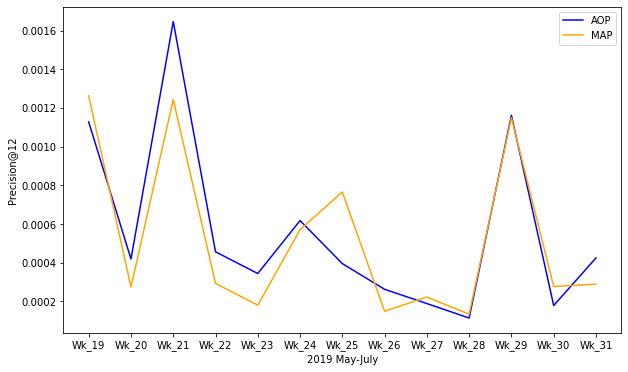

In [7]:
#plot for AOP MAP
plt.figure(figsize=(10,6))
plt.plot(random_df.timeline, random_df.AOP, color= 'blue')
plt.plot(random_df.timeline, random_df.MAP, color= 'orange')
plt.xlabel('2019 May-July')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])

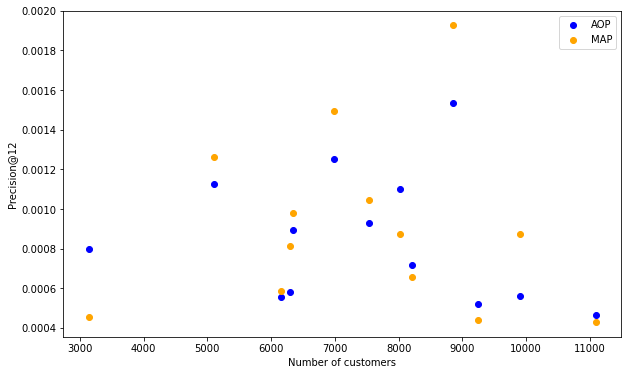

In [23]:
#scatter plot for AOP and number of users
plt.figure(figsize=(10,6))
plt.scatter(random_df.num_users, random_df.AOP, color = 'blue')
plt.scatter(random_df.num_users, random_df.MAP, color = 'orange')
plt.xlabel('Number of customers')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])